# Playground
Toy Datasets to get back into the swing of things.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Load and Explore the data

In [9]:
#Load data
from sklearn import datasets

iris_data = datasets.load_iris(as_frame=True).frame
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

# What next? 

Without a clear question of purpose when diving into the data, we have a case of self exploration.

When it comes to a collection of features that can be used to describe the identity of samples.. It seems to best first step would be to use a classification model.

I think the the choice is between:

Logistic Regression  
K-nearest neighbors (Because we have a known value for k)  
or  
Support Vector Machines

In [14]:
from sklearn.model_selection import train_test_split

#Split full dataset into data and targets
X = iris_data.iloc[:,:-1]
y = iris_data.iloc[:,-1]

#Split into training and testing sets
'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)'''

(112, 4) (112,)
(38, 4) (38,)


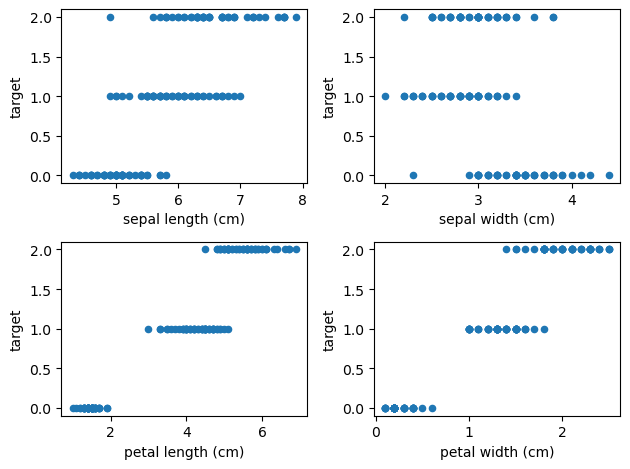

In [32]:
#Taking a look at the raw data
fig, axs = plt.subplots(2,2)
iris_data.plot.scatter(ax=axs[0,0], x='sepal length (cm)', y='target')
iris_data.plot.scatter(ax=axs[0,1], x='sepal width (cm)', y='target')
iris_data.plot.scatter(ax=axs[1,0], x='petal length (cm)', y='target')
iris_data.plot.scatter(ax=axs[1,1], x='petal width (cm)', y='target')
fig.tight_layout()

# Cross Validation
In order to find the best split of our data for training and testing, we're going to use cross validation. 
https://scikit-learn.org/stable/modules/cross_validation.html

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, random_state=64)
scores = cross_val_score(clf, X, y, cv=10) #10 k-fold is commonly used
print(scores)

[1.         0.93333333 1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]
